# 《按图索骥学机器学习》-《A07欠拟合与过拟合》

这是《按图索骥学机器学习》-《A07欠拟合与过拟合》的讲义
这门课程之所以叫按图索骥，是因为学习资料都放到了思维导图当中，大家可以根据自己的情况，选择合适的学习路径，自主学习

![avatar](pic/swnt.png)

导图和有关学习资料都放在了github(git.code946.com)上，并且在不断迭代和更新中

In [34]:
import numpy as np
import matplotlib.pyplot as plt

y = 3x^2 + 2x + 1

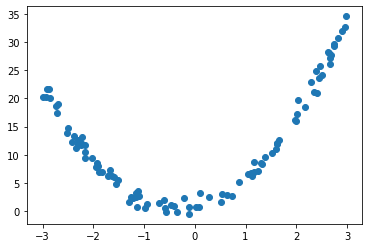

In [35]:
x = np.random.uniform(-3,3,size=100) # 从[-3,3)区间洪取100个数值，满足均匀分布
X = x.reshape(-1,1)

y = 3*x**2 + 2*x + 1 + np.random.normal(0,1,100) # 使用正太分布生成干扰项

plt.scatter(X,y)
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

### 欠拟合：只有一个特征值

In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.10578952567338129
0.34076618902251465


### 正常拟合

In [45]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
poly.fit(X)
X2 = poly.transform(X)

x2_train,x2_test,y_train,y_test = train_test_split(X2,y,test_size=0.25)

from sklearn.preprocessing import StandardScaler

std_x = StandardScaler()
x2_train = std_x.fit_transform(x2_train)
x2_test = std_x.transform(x2_test)

std_y = StandardScaler()
y_train = std_y.fit_transform(y_train.reshape(-1,1))
y_test = std_y.transform(y_test.reshape(-1,1))

from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()
lr2.fit(x2_train,y_train)

print(lr2.score(x2_train,y_train))
print(lr2.score(x2_test,y_test))

0.9914922135971387
0.9817421769460811


### 过拟合：训练集有很好的拟合效果，测试集上的拟合效果就很差

In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 40)
poly.fit(X)
X2 = poly.transform(X)

x2_train,x2_test,y_train,y_test = train_test_split(X2,y,test_size=0.25)

from sklearn.preprocessing import StandardScaler

std_x = StandardScaler()
x2_train = std_x.fit_transform(x2_train)
x2_test = std_x.transform(x2_test)

std_y = StandardScaler()
y_train = std_y.fit_transform(y_train.reshape(-1,1))
y_test = std_y.transform(y_test.reshape(-1,1))

from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()
lr2.fit(x2_train,y_train)

print(lr2.score(x2_train,y_train))
print(lr2.score(x2_test,y_test))

0.9200238596226324
-7.537430480882625
